In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing
import cv2
import os
from os import listdir
#import glob
import matplotlib.pyplot as plt
import seaborn as sns
# tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [20]:
def img_to_array(path, category_no, X, y):
    for p in os.listdir(path):
        #print(p)
        img = cv2.imread(os.path.join(path, p), cv2.IMREAD_COLOR)
        img_np = cv2.resize(img, dsize = (150, 150))
        X.append(img_np)
        y.append(category_no)

In [21]:
path_train="Resources/images/training/"


category_list = ["flip", "notflip"]

X_train = []
y_train = []

for i in range(len(category_list)):
    img_to_array(path_train + category_list[i], i, X_train, y_train)
    
X_train = np.array(X_train).reshape(-1,150,150,3)
y_train = np.array(y_train)

In [22]:
path_test="Resources/images/testing/"


category_list = ["flip", "notflip"]

X_test = []
y_test = []

for i in range(len(category_list)):
    img_to_array(path_test + category_list[i], i, X_test, y_test)
    
X_test = np.array(X_test).reshape(-1,150,150,3)
y_test = np.array(y_test)

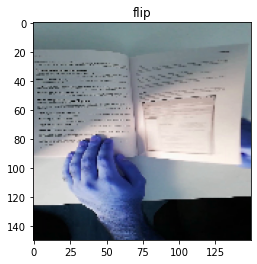

In [23]:
plt.imshow(X_train[1],cmap = "brg");
plt.title(category_list[y_train[1]]);

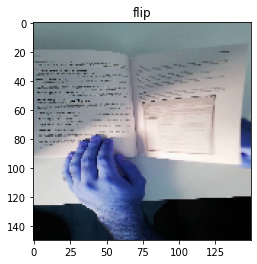

In [24]:
plt.imshow(X_train[0],cmap = "gray");
plt.title(category_list[y_train[0]]);

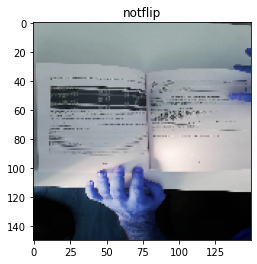

In [25]:
plt.imshow(X_train[2391],cmap = "gray")
plt.title(category_list[y_train[2391]]);

In [26]:
X_train.shape

(2392, 150, 150, 3)

C:\Users\ayesh\anaconda3\envs\PythonData\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

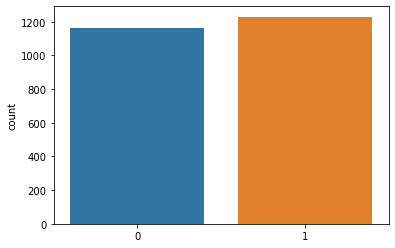

In [27]:
sns.countplot(y_train)

In [28]:
X_test.shape

(597, 150, 150, 3)

C:\Users\ayesh\anaconda3\envs\PythonData\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

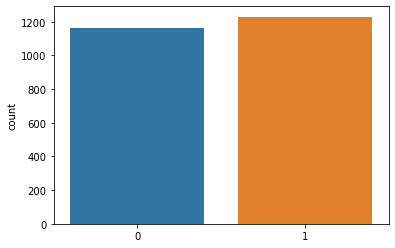

In [29]:
sns.countplot(y_train)

In [30]:
model = Sequential([
    Conv2D(32, (3,3), activation = "relu", input_shape = (150,150,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation = "relu"),
    Dropout(0.1),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation = "relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation = "relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation = "relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation = "relu"),
    Dropout(0.2),
    Dense(1, activation = "sigmoid")
])

In [31]:
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [32]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 20)

Train on 2392 samples
Epoch 1/20
2392/2392 [==============================] - 63s 27ms/sample - loss: 0.5805 - accuracy: 0.8119
Epoch 2/20
2392/2392 [==============================] - 67s 28ms/sample - loss: 0.2601 - accuracy: 0.9038
Epoch 3/20
2392/2392 [==============================] - 68s 28ms/sample - loss: 0.1717 - accuracy: 0.9306
Epoch 4/20
2392/2392 [==============================] - 68s 28ms/sample - loss: 0.1085 - accuracy: 0.9620
Epoch 5/20
2392/2392 [==============================] - 68s 29ms/sample - loss: 0.1442 - accuracy: 0.9540
Epoch 6/20
2392/2392 [==============================] - 70s 29ms/sample - loss: 0.0810 - accuracy: 0.9762
Epoch 7/20
2392/2392 [==============================] - 71s 30ms/sample - loss: 0.0701 - accuracy: 0.9783
Epoch 8/20
2392/2392 [==============================] - 69s 29ms/sample - loss: 0.0636 - accuracy: 0.9778
Epoch 9/20
2392/2392 [==============================] - 68s 29ms/sample - loss: 0.0370 - accuracy: 0.9883
Epoch 10/20
2392/2392 [=

In [33]:
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f" % (accuracy*100))

597/597 [==============================] - 2s 4ms/sample - loss: 1.8647 - accuracy: 0.6432
Accuracy: 64.32


In [35]:
train_loss = history.history['loss']
#val_loss = history.history['val_loss']

In [38]:
 train_auc_name = list(history.history.keys())[1]
 #val_auc_name = list(history.history.keys())[1]
 train_auc = history.history[train_auc_name]
#val_auc = history.history[val_auc_name]

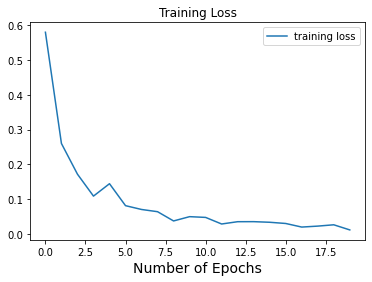

In [39]:
  ## PLOT 1: TRAIN VS. VALIDATION LOSS 
#plt.subplot(12,12,11)
plt.title("Training Loss")
plt.plot(train_loss, label='training loss')
#plt.plot(val_loss, label='validation loss')
plt.xlabel("Number of Epochs", size=14)
plt.legend()

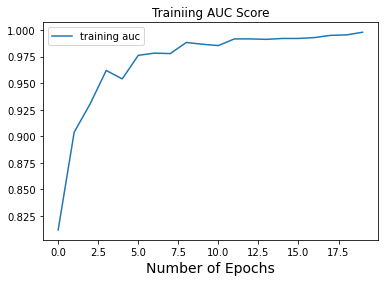

In [41]:
plt.title("Trainiing AUC Score")
plt.plot(train_auc, label='training auc')
#plt.plot(val_auc, label='validation auc')
plt.xlabel("Number of Epochs", size=14)
plt.legend()

In [51]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(directory = path_test, 
                                                 target_size = (150, 150),
                                                 batch_size = 32, 
                                                 class_mode = 'binary',
                                            
                                                 shuffle=False,
                                                 seed = 42)

Found 597 images belonging to 2 classes.


In [52]:
y_true = test_generator.classes
Y_pred = model.predict_generator(test_generator, steps = len(test_generator))
y_pred = (Y_pred > 0.5).T[0]
y_pred_prob = Y_pred.T[0]

Instructions for updating:
Please use Model.predict, which supports generators.


In [53]:
cm = confusion_matrix(y_true, y_pred)
names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
labels = np.asarray(labels).reshape(2,2)
ticklabels = ['flip', 'notflip']

Text(26.5, 0.5, 'Actual')

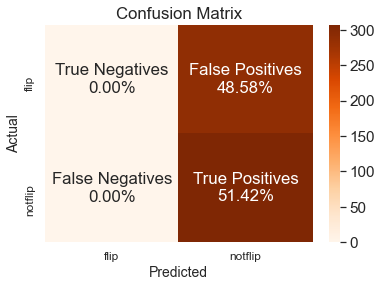

In [54]:
# Create confusion matrix as heatmap
sns.set(font_scale = 1.4)
ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
plt.xlabel("Predicted", size=14)
plt.ylabel("Actual", size=14) 

In [56]:
 ## Summary Statistics
TN, FP, FN, TP = cm.ravel() # cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
accuracy = (TP + TN) / np.sum(cm) # % positive out of all predicted positives
precision = TP / (TP+FP) # % positive out of all predicted positives
recall =  TP / (TP+FN) # % positive out of all supposed to be positives
specificity = TN / (TN+FP) # % negative out of all supposed to be negatives
f1 = 2*precision*recall / (precision + recall)
stats_summary = '[Summary Statistics]\nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(accuracy, precision, recall, specificity, f1)
print(stats_summary)

[Summary Statistics]
Accuracy = 51.42% | Precision = 51.42% | Recall = 100.00% | Specificity = 0.00% | F1 Score = 67.92%
